In [10]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
import symreg
from gpbenchmarks import get_data

from experiment_settings import nguyen7_funset, pagie_funset, keijzer_funset, korns12_funset, vlad_funset


In [11]:
import pygmo as pg

In [12]:
vectors = []
n_actives = []

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):
        #vectors.append(x)
        
        individual = tengp.individual.NPIndividual(list(x), self.bounds, self.params)
        pred = individual.transform(self.X)
        
        #n_actives.append(len(individual.active_nodes))
        
        try:
            return [mean_squared_error(pred, self.Y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        return self.bounds

In [13]:
kw_params = {'real_valued': True, 'max_back': 20}

params_nguyen7 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_pagie1  = tengp.Parameters(2, 1, 1, 50, pagie_funset, **kw_params)
params_keijzer6 = tengp.Parameters(2, 1, 1, 50, keijzer_funset, **kw_params)
params_korns = tengp.Parameters(6, 1, 1, 50, korns12_funset, **kw_params)
params_vlad = tengp.Parameters(6, 1, 1, 50, vlad_funset, **kw_params)

In [14]:
import random 

data = [
    ('nguyen7', symreg.get_benchmark_nguyen7(random, None), params_nguyen7),
    ('pagie1', symreg.get_benchmark_pagie1(random, None), params_pagie1),
    ('keijzer6', symreg.get_benchmark_keijzer(random, 6), params_keijzer6),
    ('korns12', symreg.get_benchmark_korns(random, 12), params_korns),
    ('vladislasleva4', symreg.get_benchmark_vladislasleva4(random, None), params_vlad)
]

In [15]:
%%time
results = []
champions = []


for name, (x_train, y_train, x_test, y_test), params in data:
    bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]
    
    prob = pg.problem(cost_function(np.c_[x_train, np.ones(len(x_train))], y_train, params, bounds))
    
    problem_results = []
    pg.set_global_rng_seed(42)
    for i in range(1):
        print(i, end=',')
        algo = pg.algorithm(pg.pso(gen=200))
        algo.set_verbosity(1)
        pop = pg.population(prob, 50)
        pop = algo.evolve(pop)
        problem_results.append(pop.champion_f[0])
        champions.append(pop.champion_x)
    results.append(problem_results)

0,0,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in multiply
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: overflow encountered in multiply
  u = a*

0,0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:23: RuntimeWarning: overflow encountered in square
  return x**2
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:26: RuntimeWarning: overflow encountered in power
  return x**3
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: RuntimeWarning: invalid value encountered in sin
  return np.sin(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:17: RuntimeWarning: invalid value encountered in cos
  return np.cos(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:29: RuntimeWarning: invalid value encountered in tan
  return np.tan(x)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: in

0,CPU times: user 3min 45s, sys: 516 ms, total: 3min 46s
Wall time: 3min 57s


In [29]:
def plot_results(name, outs):
    print(name)
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    plt.figure()
    plt.title(name)
    sns.distplot(costs, kde=False);
    

nguyen7
min: 0.0001369095543340497
mean: 0.0001369095543340497
median: 0.0001369095543340497
variance: 0.0
pagie1
min: 0.10227475768506075
mean: 0.10227475768506075
median: 0.10227475768506075
variance: 0.0
keijzer6
min: 0.00012481977432535267
mean: 0.00012481977432535267
median: 0.00012481977432535267
variance: 0.0
korns12
min: 1.137180586205629
mean: 1.137180586205629
median: 1.137180586205629
variance: 0.0
vladislasleva4
min: 0.032076812094467076
mean: 0.032076812094467076
median: 0.032076812094467076
variance: 0.0


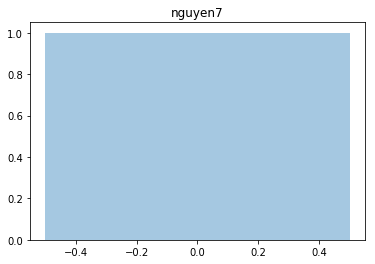

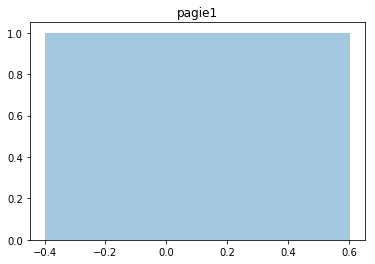

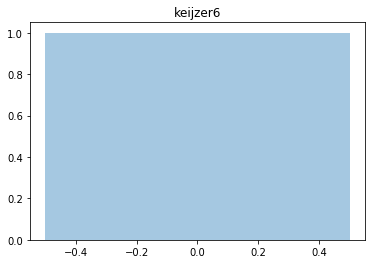

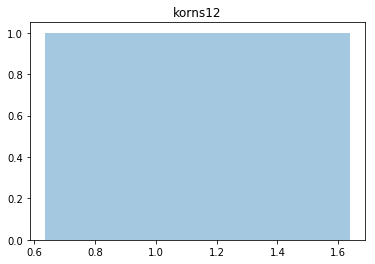

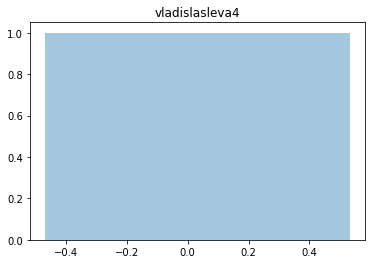

In [30]:
for d, result in zip(data, results):
    plot_results(d[0], result)

In [ ]:
print('Nguyen7')
plot_results(results[1])

In [ ]:
print('Nguyen10')
plot_results(results[2])

In [ ]:
print('Korns12')
plot_results(results[3])

In [ ]:
return 10 / ( 5 + np.sum([(x - 3)**2 for x in [x1, x2, x3, x4, x5]]))